In [4]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ purrr     1.0.2
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::fil

In [5]:
url <- "https://raw.githubusercontent.com/jaimejkeith29-ubcdcsi/DSCI_Individual_Project_Planning/main/players.csv"
destfile <- "players.csv"

download.file(url, destfile, method = "curl")

library(readr)
players <- read_csv(destfile)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


The data set “player.csv” provides information on the players who are playing on this minecraft server.

In [6]:
players

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


The date set has 7 variables that fall under character, numerical and logical categories
- Character
    - name
    - gender
    - hashed_email
    - experience level
        - reflects how much they have played the game/how well they know it
- numerical 
    - Age
    - Hours_played
- Logical
    - Subscription

| Total number of observations | Average Age | Average amount of Hours Played |
|------------------------------|-------------|--------------------------------|
|            1,372             |    21.14    |           5.85 hours           |


The main question to address is which “kinds” of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts. The more specific question this project is going to explore is can age predict how many hours someone will play on this minecraft server in the player.csv data set?

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


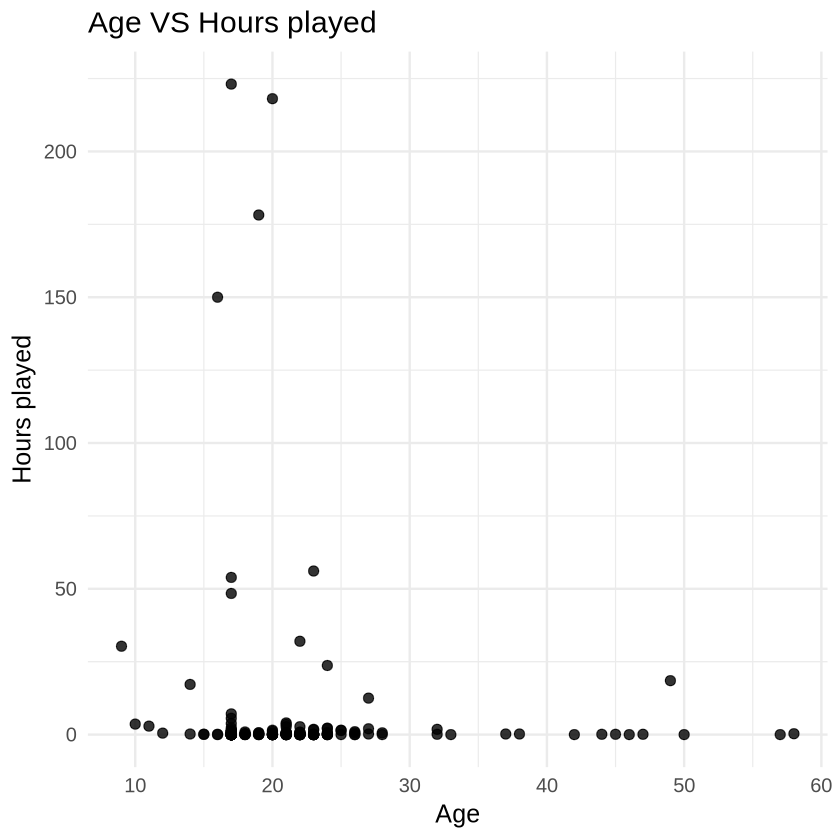

In [7]:
Age_plot <- ggplot(players, aes(x = Age, y = played_hours)) +
  geom_point(size = 2.5, alpha = 0.8) +
  labs(
    title = "Age VS Hours played",
    x = "Age",
    y = "Hours played") +
    theme_minimal(base_size = 15)

Age_plot

When we plot Age and hours_played against eachother, we see that their relationship is not linear, most of our data is clustered along the bottom of the plot. This plot also shows there are a couple of big outliers for the hours_played variable, making the majority of the data hard to  read. If we scale our plot to zoom in on the majority our data at the bottom, it should look like this:

Warning message:
“Removed 15 rows containing missing values or values outside the scale range
(`geom_point()`).”


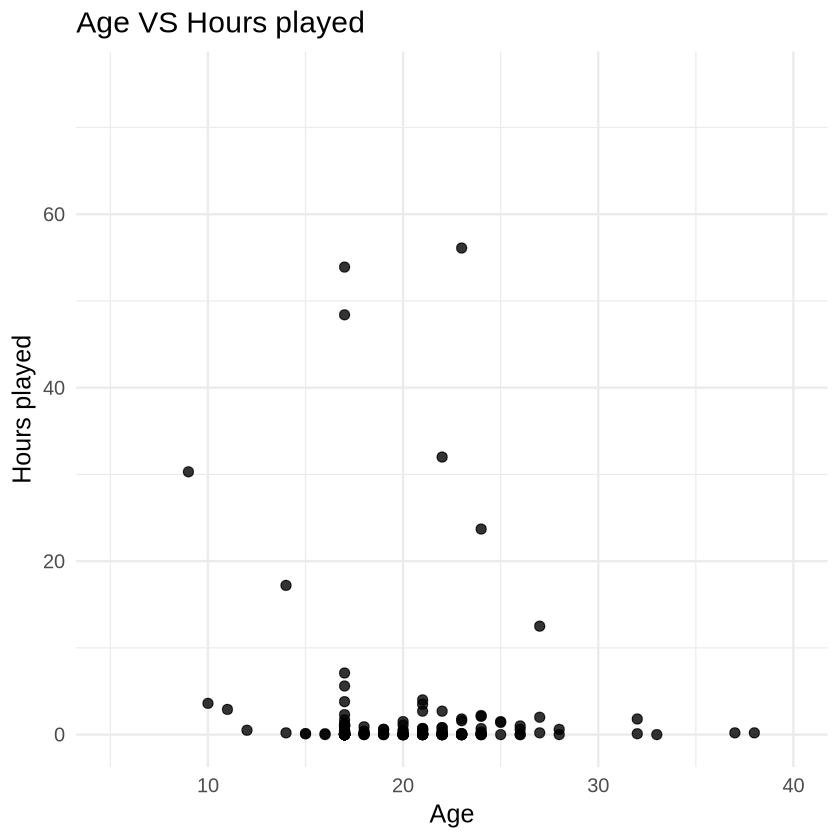

In [8]:
Age_plot_scaled <- ggplot(players, aes(x = Age, y = played_hours)) +
  geom_point(size = 2.5, alpha = 0.8) +
  labs(
    title = "Age VS Hours played",
    x = "Age",
    y = "Hours played") +
    theme_minimal(base_size = 15)+
     scale_x_continuous(limits = c(5, 40)) +
  scale_y_continuous(limits = c(0, 75))

Age_plot_scaled

After we scale the plot, we can see a little clearer that there are different peaks of numbers of hours played at different ages, but still no clear relationship.

I believe the best method to answer this question is K-nearest neighbor (KKN) regression because it works well with non-linear data. In order to use KKN we will have to assume similar ages correspond to similar number of hours and that the variables are scaled properly so that distances between observations are meaningful. A potential limit of using KKN regression could be that it can be sensitive to outliers which we know this data set has. I will compare and select my model by using cross validation. I will have multiple possible K values, use k-fold cross validation for each k to estimate predictive accuracy and then select the model with the lowest RMSE value.

My plan to process and apply the above model is to:

1. Removing missing values from the Age and hours_played columns (our numeric variables) 
2. Scale the data to standardize the numeric variables
3. Split the data into 80% training data and 20% testing data
4. Use 5-fold cross validation on the training set to choose the best K (like stated above)
5. Evaluate the final models performance on the test data using RMSE and R-squared
6. Compare the predicted hours vs actual hours in the test set to interpret the accuracy
